## Elías Garza Valdés A01284041
Problema de los autos

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv(r'../Data/precios_autos.csv')
df

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohc,four,141,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,sedan,rwd,front,109.1,188.8,68.8,55.5,...,ohc,four,141,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohcv,six,173,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohc,six,145,3.40,23.0,106,4800,26,27,22470.0


# Analisis de variables numéricas

In [3]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Veremos ahora si tenemos outliers utilizando boxplots

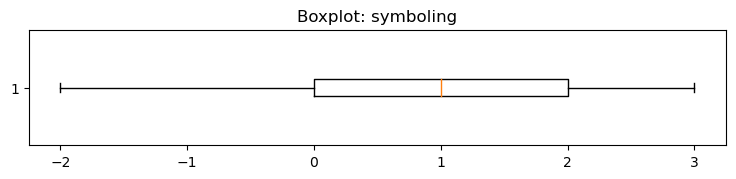

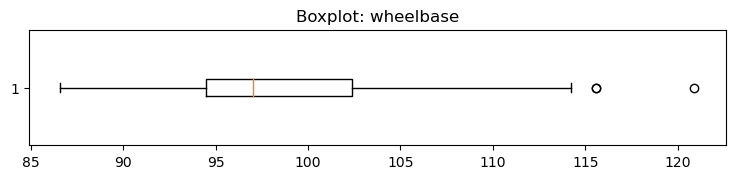

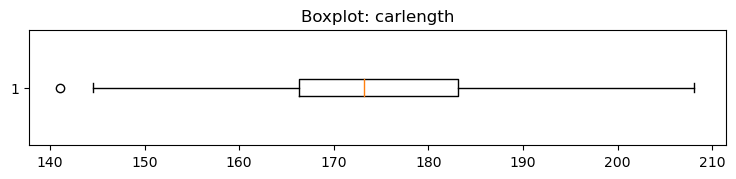

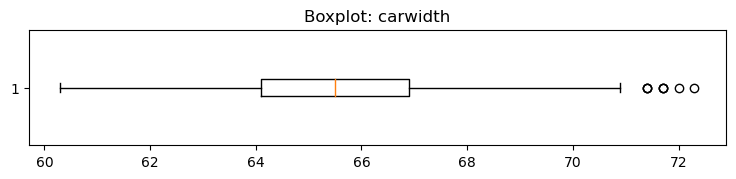

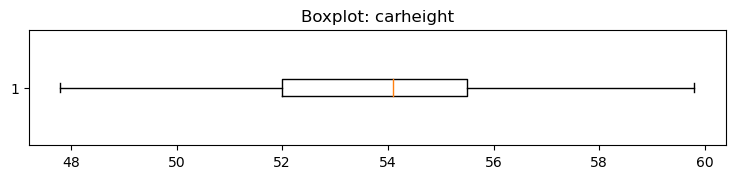

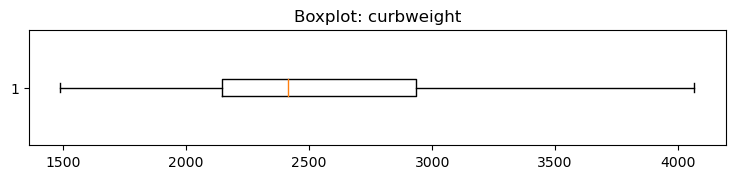

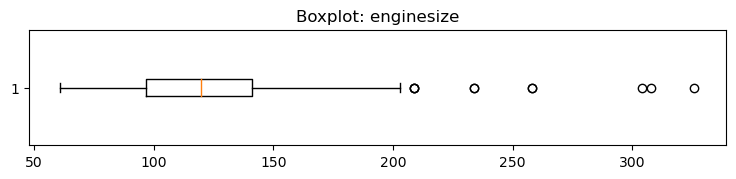

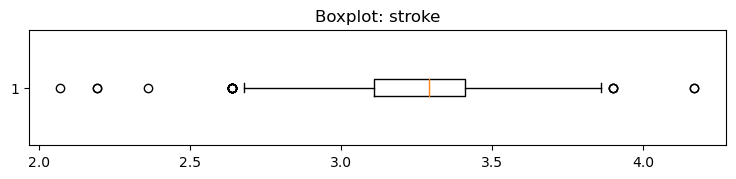

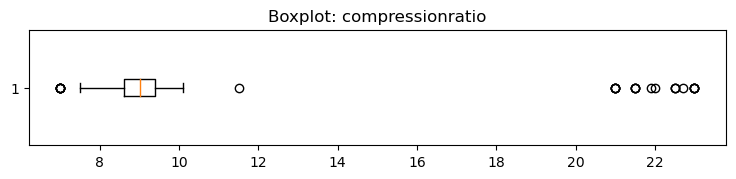

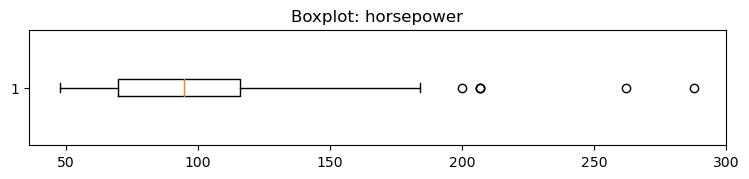

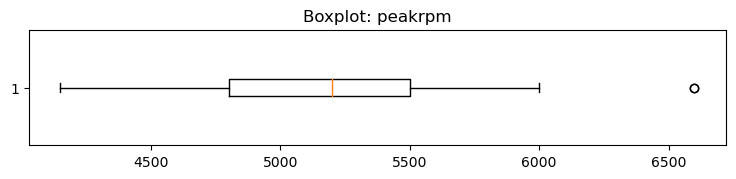

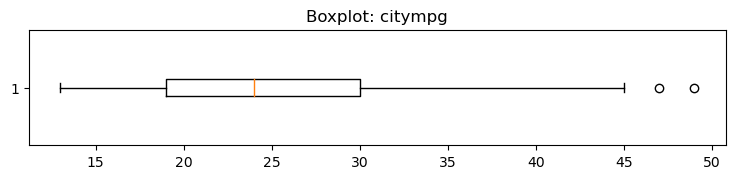

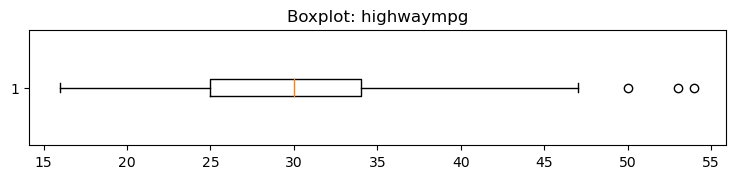

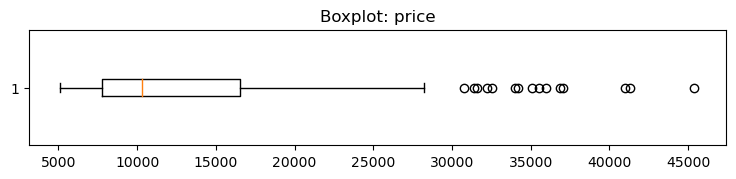

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(9,1.5))
    plt.boxplot(df[col], vert = False)
    plt.title(f'Boxplot: {col}')
    plt.show()

Veremos un poco de como se distribuyen las variables con algunos histogramas

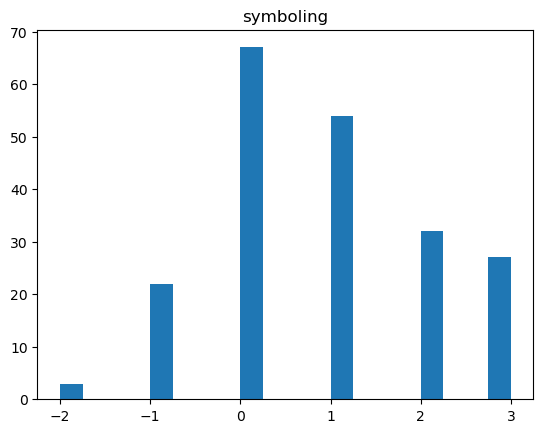

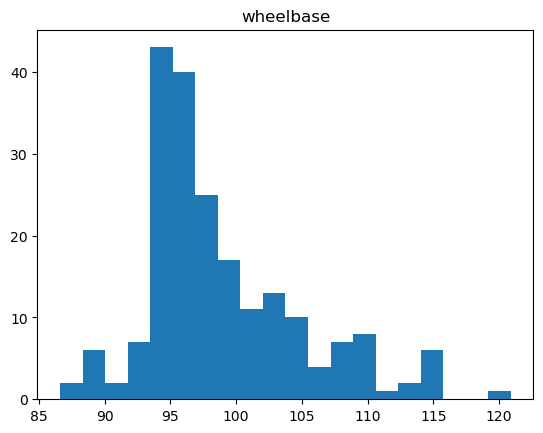

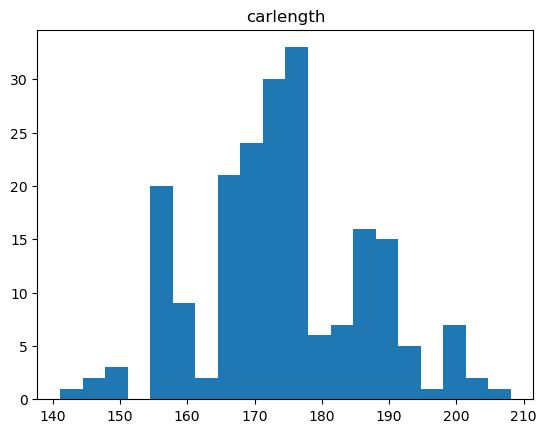

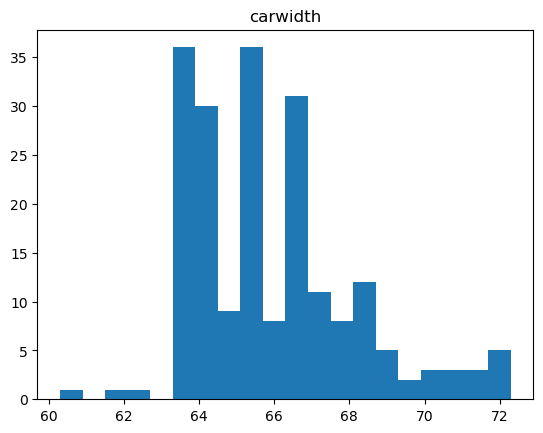

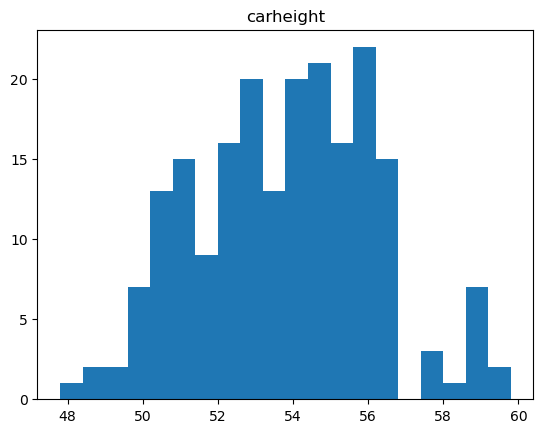

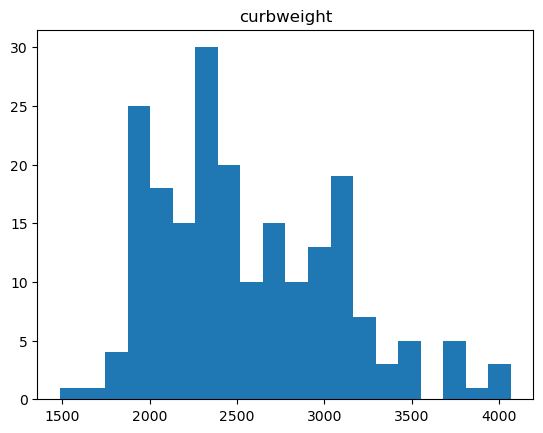

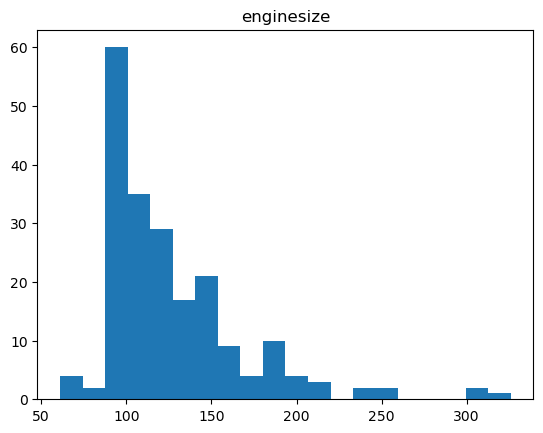

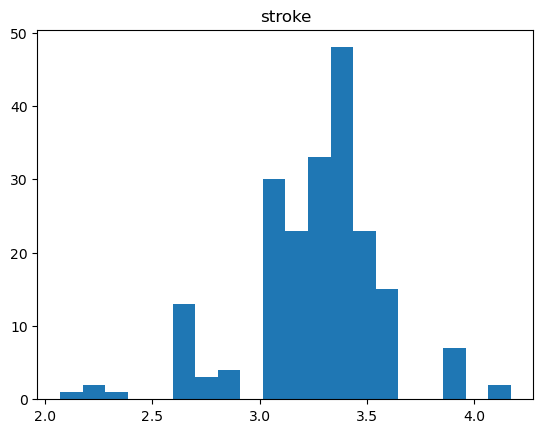

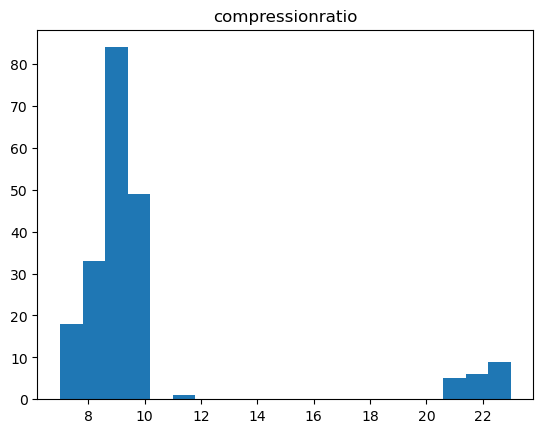

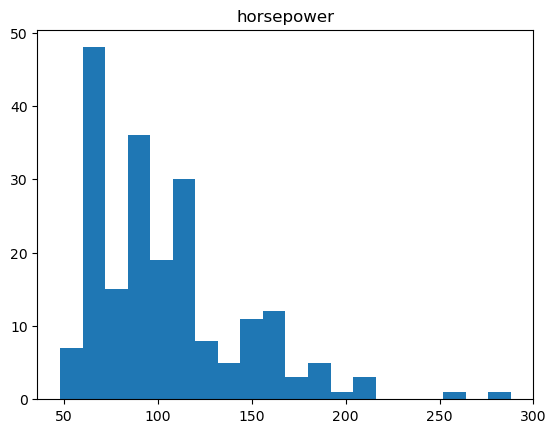

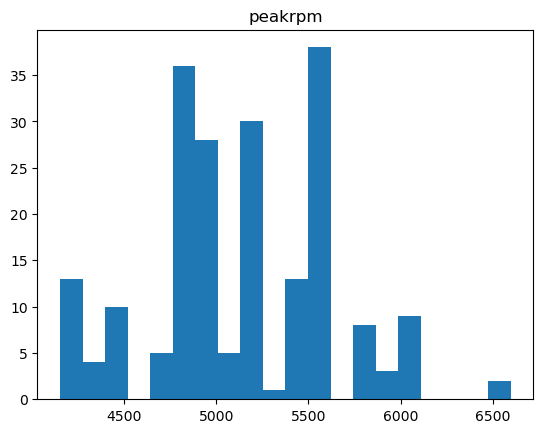

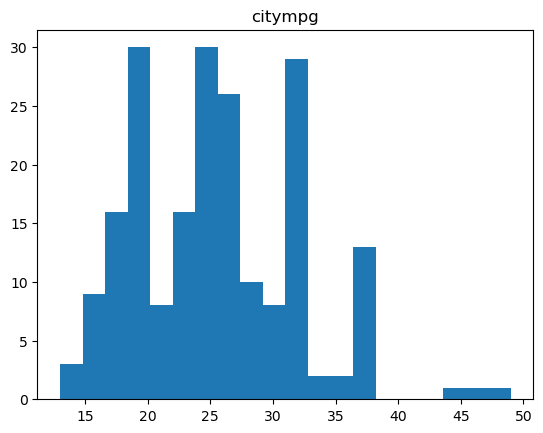

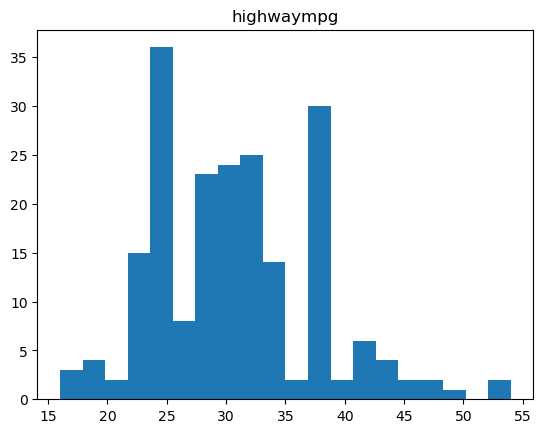

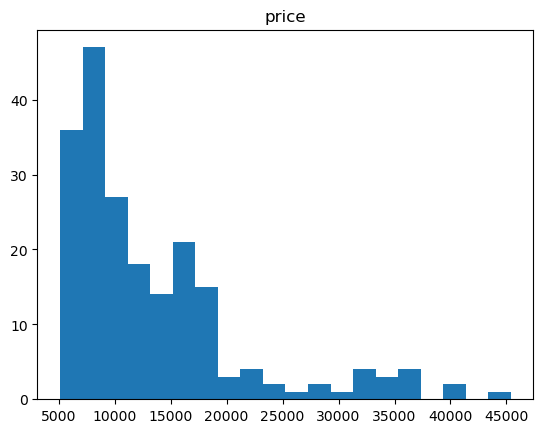

In [5]:
for col in numeric_cols:
    plt.hist(df[col], bins = 20)
    plt.title(f'{col}')
    plt.show()

Ahora veremos si tenemos variables normales utilizando qqplots y la prueba de anderson darling. 

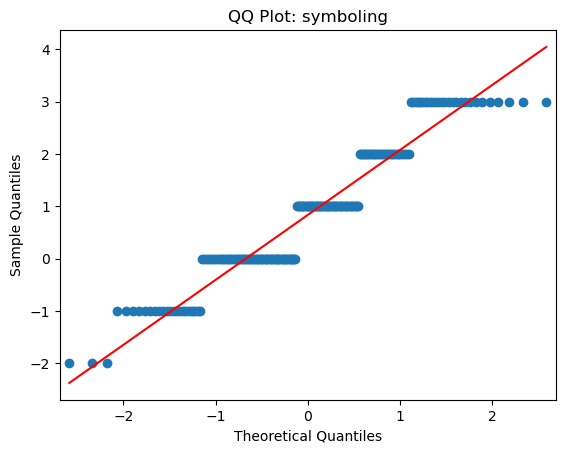

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


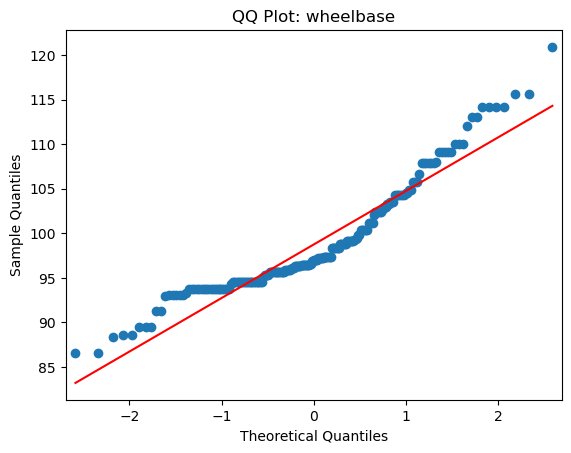

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


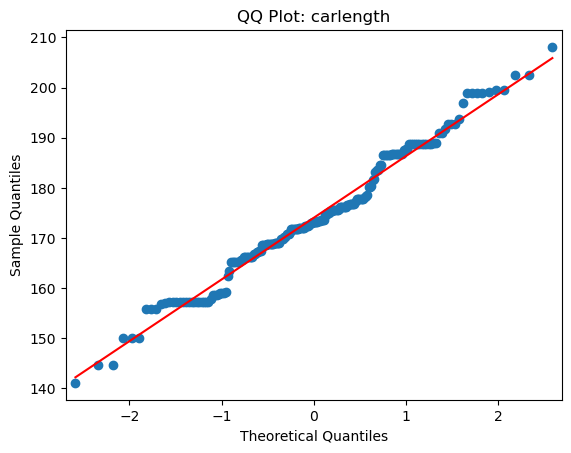

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


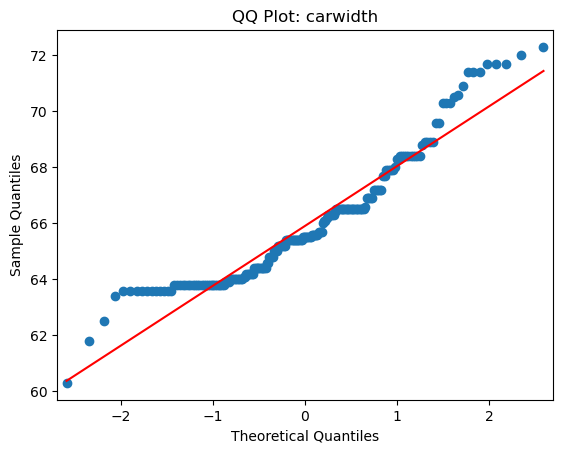

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


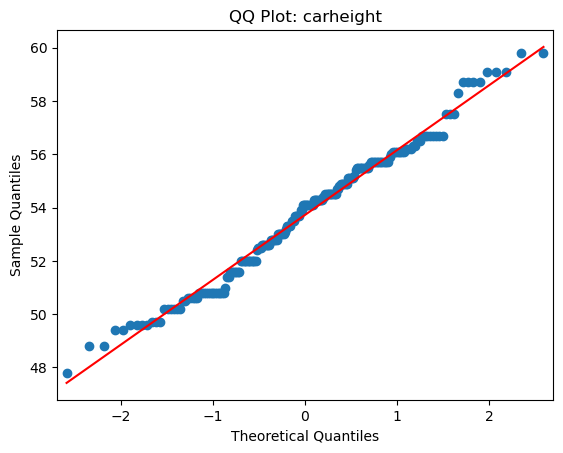

Is data normally distributed: True via Anderson-Darling test with significance of: 99.0 %


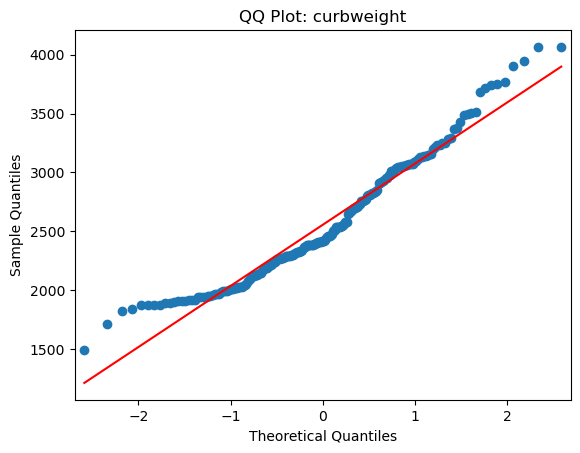

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


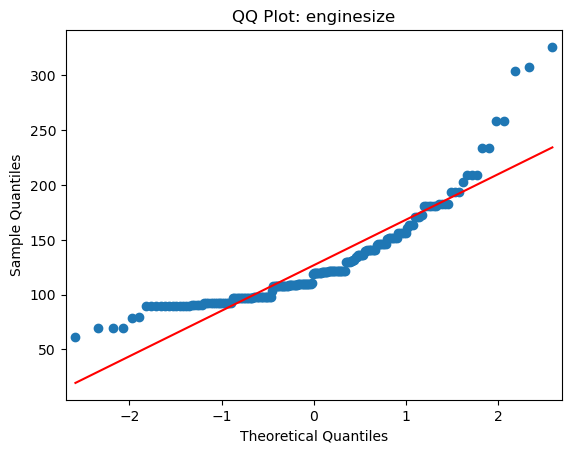

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


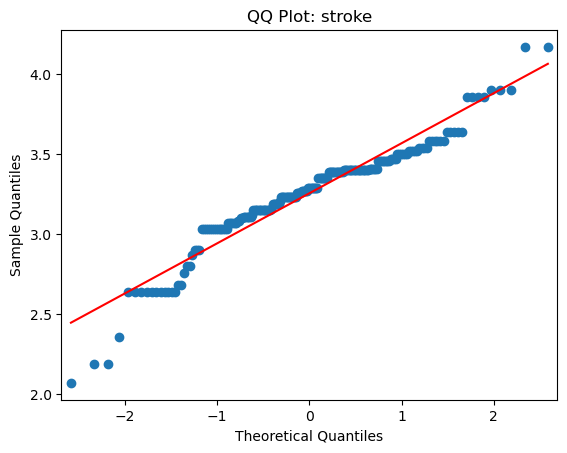

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


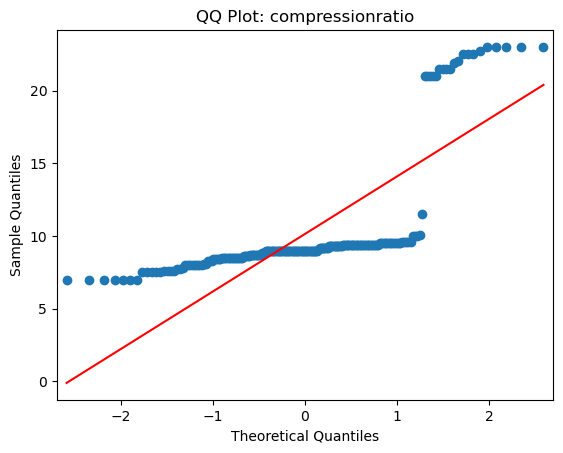

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


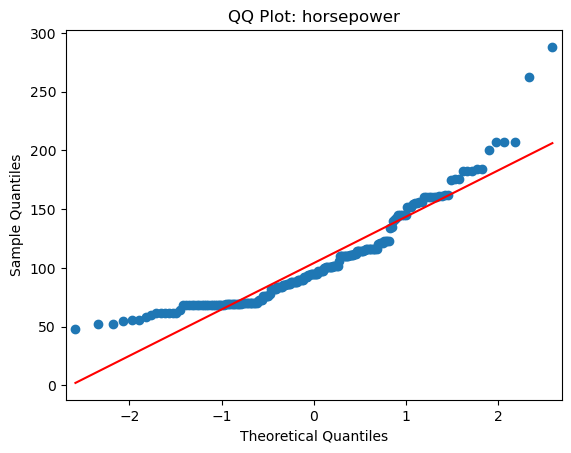

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


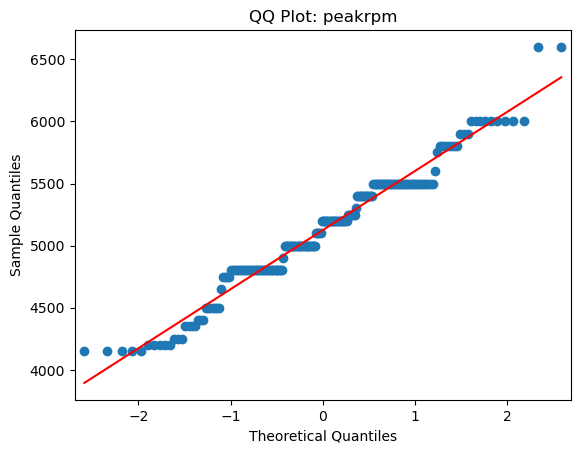

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


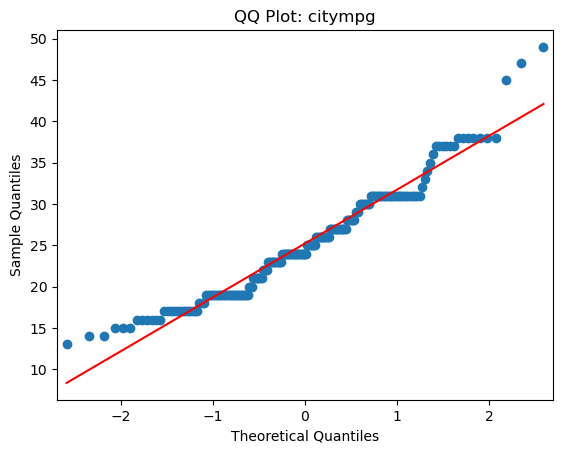

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


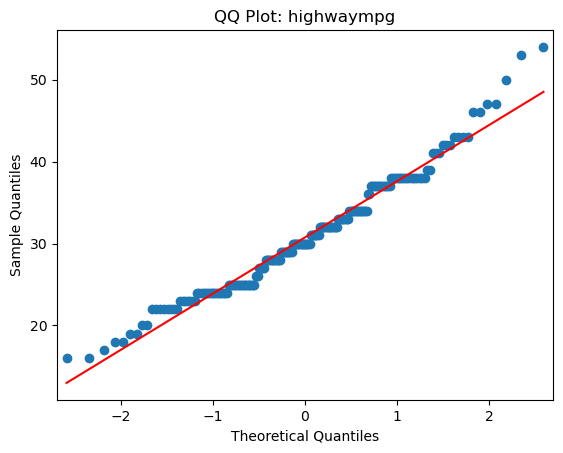

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


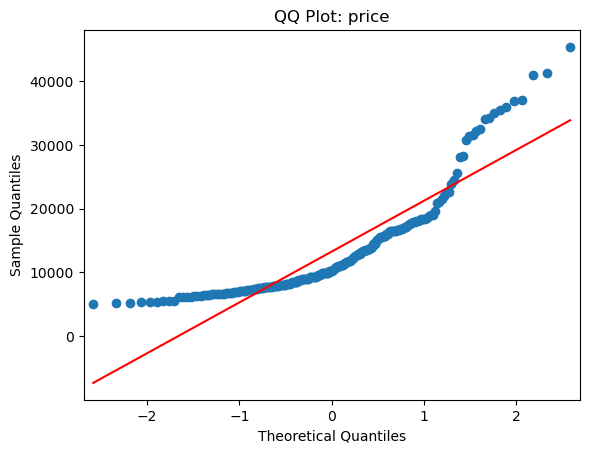

Is data normally distributed: False via Anderson-Darling test with significance of: 99.0 %


In [6]:

for col in numeric_cols:
    sm.qqplot(df[col], line='s')

    # Add title and labels
    plt.title(f"QQ Plot: {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

    # Display the plot
    plt.show()
    result = stats.anderson(df[col])
    print("Is data normally distributed:", result.statistic < result.critical_values[4],
          'via Anderson-Darling test with significance of:' ,100 - result.significance_level[4], '%')
          

No hay nada normal :( 

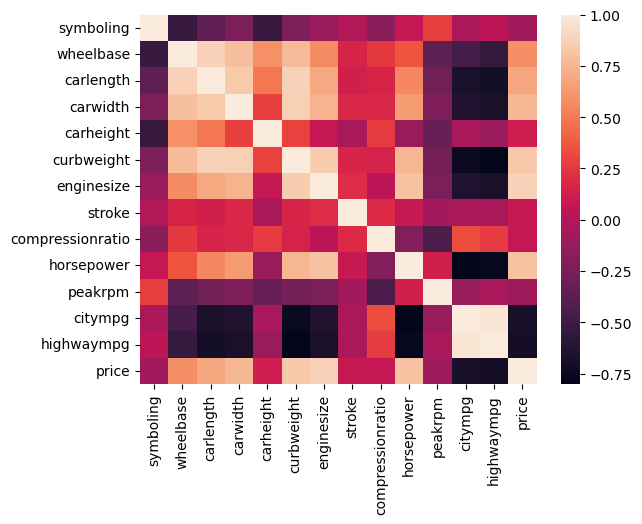

In [7]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

Aqui podemos ver que hay varias variables que quisieramos fueran independientes con una alta correlación por lo que vamos a tener que trabajar con ellas de una manera especial. Podriamos intentar hacer un análisis de componentes principales para agrupar estas variables pero nos encontraremos con las trabas de que no se distribuyen normalmente. Tal vez tengamos entonces que hacer un analisis de factores por máxima verosimilitud o alguna otra técnica. 

EN cuanto a valores nulos, tenemos una base relativamente limpia por lo que no nos tenemos que preocupar tanto por esto como podemos ver a continuación. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber'],
      dtype='object')

In [14]:

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print("-" * 20)
    print("Unique values:", df[col].nunique())



Column: CarName
--------------------
Unique values: 147

Column: fueltype
--------------------
Unique values: 2

Column: carbody
--------------------
Unique values: 5

Column: drivewheel
--------------------
Unique values: 3

Column: enginelocation
--------------------
Unique values: 2

Column: enginetype
--------------------
Unique values: 7

Column: cylindernumber
--------------------
Unique values: 7


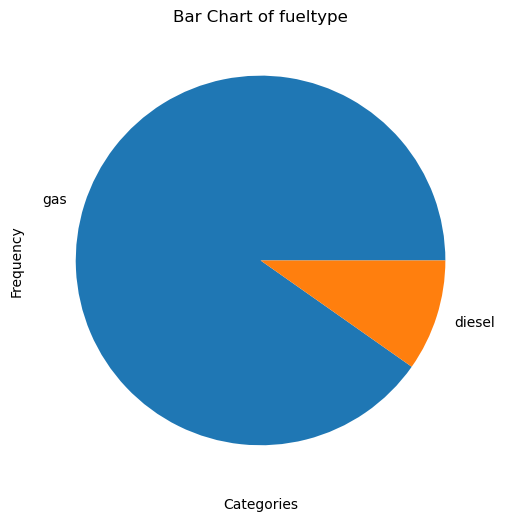

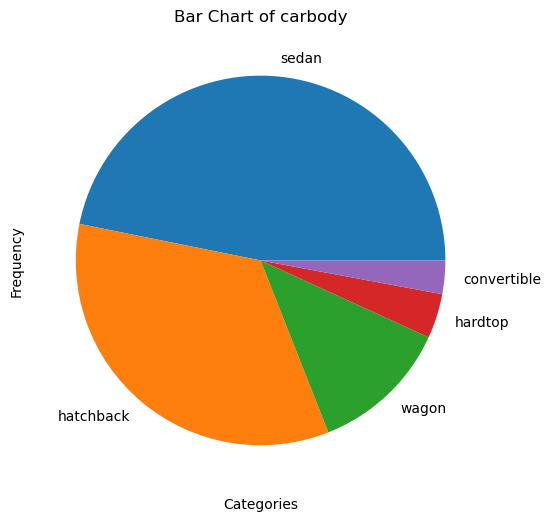

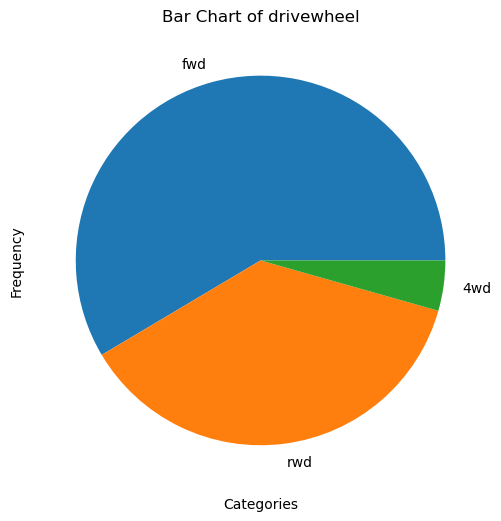

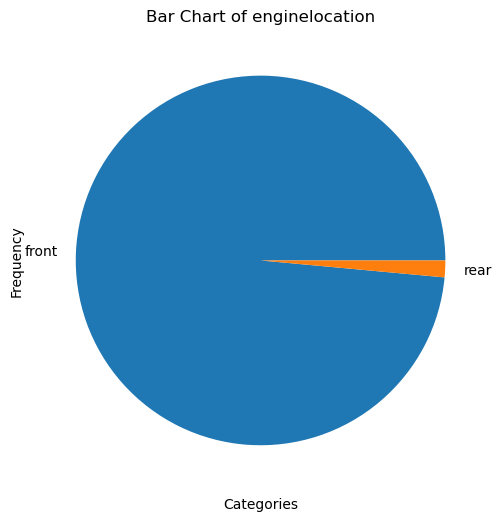

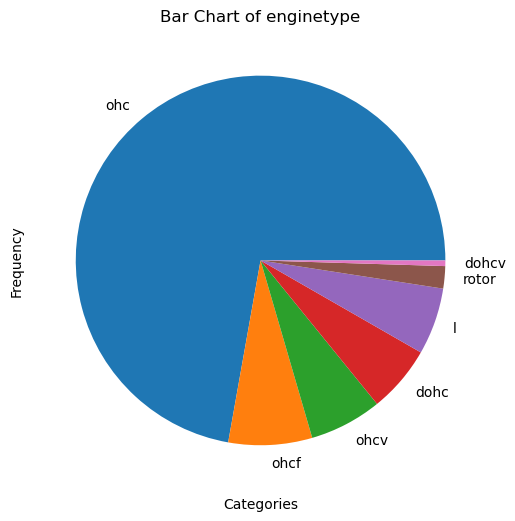

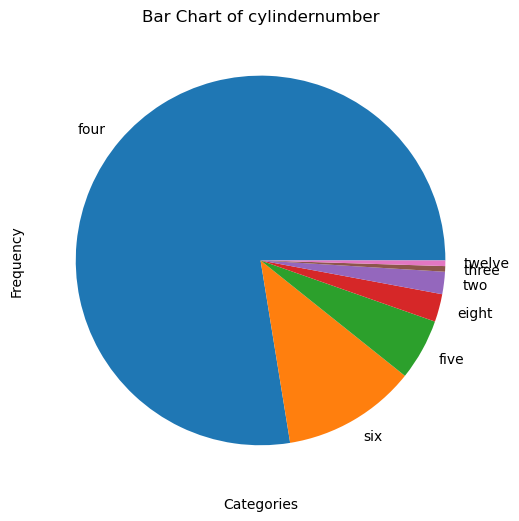

In [18]:
import matplotlib.pyplot as plt

for col in categorical_columns[1:]:
    plt.figure(figsize=(10,6))
    df[col].value_counts().plot(kind='pie')
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Frequency')
    plt.xlabel('Categories')
    plt.show()